# ✅ RESUELTO — Árbol de Decisión en Breast Cancer (Wisconsin)

**Objetivo:** clasificar tumores como **benignos** o **malignos** usando un **Árbol de Decisión**.  
**Dataset:** `sklearn.datasets.load_breast_cancer` (30 características numéricas).

**Aprenderás a:**
- Entrenar un `DecisionTreeClassifier` y visualizar el árbol.
- Evaluar con `accuracy`, `classification_report` y `matriz de confusión`.
- Interpretar **importancias de características** y el impacto de `max_depth`.

## Paso 0 — Imports y configuración

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

np.random.seed(42)

## Paso 1 — Carga del dataset y *train/test split*

In [2]:
data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names
target_names = data.target_names

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

X_train.shape, X_test.shape, np.bincount(y_train)

((455, 30), (114, 30), array([170, 285]))

## Paso 2 — Modelo base y con profundidad limitada

In [3]:
tree_base = DecisionTreeClassifier(random_state=42)
tree_shallow = DecisionTreeClassifier(max_depth=4, random_state=42)

tree_base.fit(X_train, y_train)
tree_shallow.fit(X_train, y_train)

y_pred_base = tree_base.predict(X_test)
y_pred_shal = tree_shallow.predict(X_test)

acc_base = accuracy_score(y_test, y_pred_base)
acc_shal = accuracy_score(y_test, y_pred_shal)

print(f"Accuracy (árbol sin límite): {acc_base:.3f}")
print(f"Accuracy (max_depth=4):       {acc_shal:.3f}")

Accuracy (árbol sin límite): 0.912
Accuracy (max_depth=4):       0.939


## Paso 3 — Matrices de confusión e informe de clasificación


=== Árbol completo ===
              precision    recall  f1-score   support

   malignant      0.848     0.929     0.886        42
      benign      0.956     0.903     0.929        72

    accuracy                          0.912       114
   macro avg      0.902     0.916     0.907       114
weighted avg      0.916     0.912     0.913       114



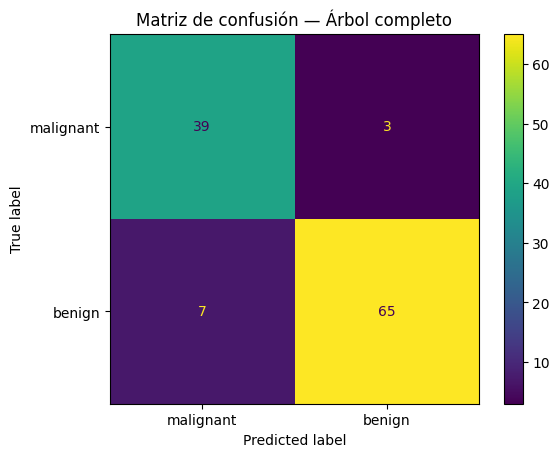


=== Árbol max_depth=4 ===
              precision    recall  f1-score   support

   malignant      0.907     0.929     0.918        42
      benign      0.958     0.944     0.951        72

    accuracy                          0.939       114
   macro avg      0.932     0.937     0.934       114
weighted avg      0.939     0.939     0.939       114



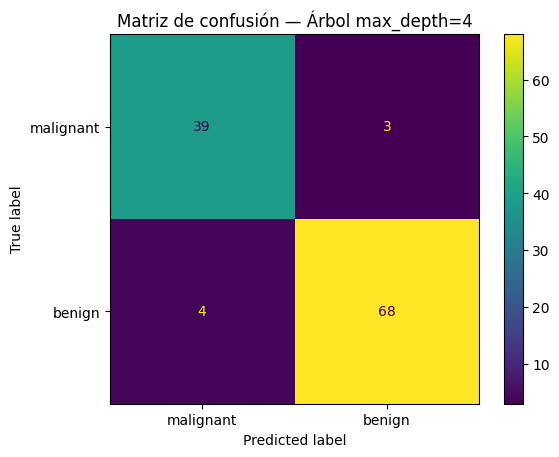

In [4]:
for name, y_pred in [("Árbol completo", y_pred_base), ("Árbol max_depth=4", y_pred_shal)]:
    print(f"\n=== {name} ===")
    print(classification_report(y_test, y_pred, target_names=target_names, digits=3))
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
    disp.plot()
    plt.title(f"Matriz de confusión — {name}")
    plt.show()

## Paso 4 — Visualización del árbol (versión reducida)

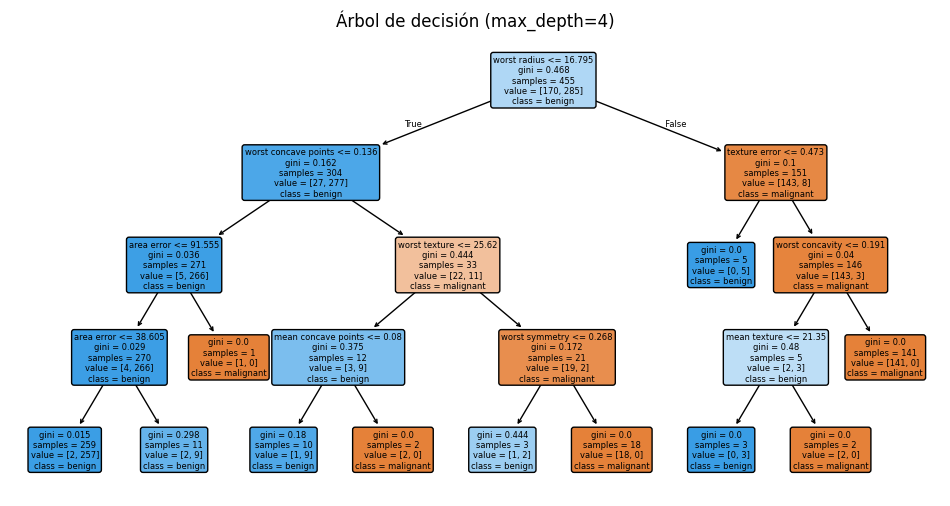

In [5]:
plt.figure(figsize=(12, 6))
plot_tree(tree_shallow, feature_names=feature_names, class_names=target_names, filled=True, rounded=True, fontsize=6)
plt.title("Árbol de decisión (max_depth=4)")
plt.show()

## Paso 5 — Importancia de características

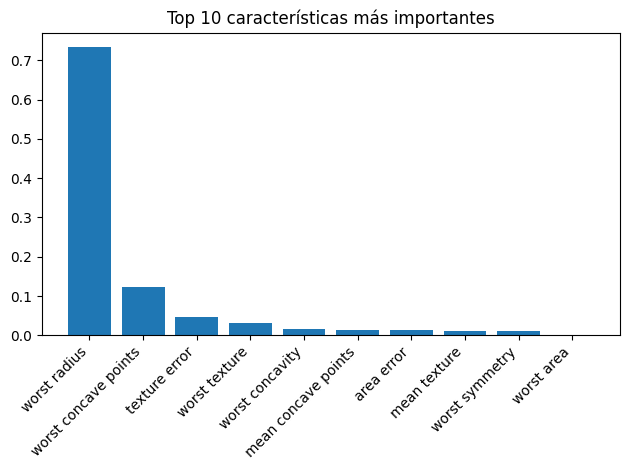

In [6]:
importances = tree_shallow.feature_importances_
idx_sorted = np.argsort(importances)[::-1][:10]  # top 10

plt.figure()
plt.bar(range(len(idx_sorted)), importances[idx_sorted])
plt.xticks(range(len(idx_sorted)), [feature_names[i] for i in idx_sorted], rotation=45, ha='right')
plt.title("Top 10 características más importantes")
plt.tight_layout()
plt.show()

## Conclusión didáctica
- El **árbol completo** puede sobreajustar; limitar `max_depth` suele **mejorar generalización**.  
- Las **importancias** indican qué variables contribuyen más a las decisiones.  
- Ventaja: **interpretabilidad**. Precaución: controlar complejidad para evitar sobreajuste.